## Panda Data Structures

Series : 1D array 
DataFrames : 2D table - like spreadsheet

In [50]:
import numpy as np
import pandas as pd
%matplotlib inline

## Series
Creating : pd.Series(data, index=optionalIndex)
    
data
* Python dict
* ndarray
* scalar

In [4]:
ints = pd.Series([1,3,5,6])
ints

0    1
1    3
2    5
3    6
dtype: int64

In [5]:
pd.Series(5, index=['a','b','c'])

a    5
b    5
c    5
dtype: int64

In [6]:
pd.Series(np.random.randn(3), index=['a', 'b', 'c'])

a    0.442786
b   -1.317345
c   -0.239429
dtype: float64

In [7]:
pd.Series(np.random.randn(3), ['a', 'c', 'd'])

a   -0.438432
c    0.462886
d   -0.092480
dtype: float64

### Series from Dictionary

In [8]:
d = {'a': 0., 'b': 1., 'c': 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [9]:
pd.Series(d, ['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

# Accessing Elements

In [10]:
ints = pd.Series([1,3,5,6])
ints[2]

5

In [11]:
ints[2] = 11
ints

0     1
1     3
2    11
3     6
dtype: int64

In [12]:
ints.get(2)

11

In [13]:
ints.index

RangeIndex(start=0, stop=4, step=1)

In [14]:
ints.dtype

dtype('int64')

### Out of Range

In [15]:
ints = pd.Series([1,3,5,6])
x = ints.get(10)
print(x)

None


In [16]:
ints[10]

KeyError: 10

### Default Value

In [17]:
ints.get(10, -1)

-1

### Explicit Index

In [18]:
ints = pd.Series([1,3,5,7], index=['a','b','c','d'])
ints

a    1
b    3
c    5
d    7
dtype: int64

In [19]:
ints['b']

3

In [20]:
ints[['a','c','d']]

a    1
c    5
d    7
dtype: int64

In [21]:
ints[0]

1

In [22]:
ints[[1,2]]

b    3
c    5
dtype: int64

### In
ints = pd.Series([1,3,5,7], index=['a','b','c','d'])

In [23]:
'b' in ints

True

In [24]:
3 in ints

False

### Slicing
ints = pd.Series([1,3,5,7], index=['a','b','c','d'])

In [25]:
ints['a':'c']

a    1
b    3
c    5
dtype: int64

In [26]:
ints['c':]

c    5
d    7
dtype: int64

In [27]:
ints = pd.Series([1,3,5,7], index=['a','b','c','d'])

In [28]:
ints[1:3]

b    3
c    5
dtype: int64

In [29]:
ints['a':'c'] = 0
ints

a    0
b    0
c    0
d    7
dtype: int64

In [30]:
ints['b','d'] = 11
ints

a     0
b    11
c     0
d    11
dtype: int64

In [31]:
ints = pd.Series([1,3,5,7], index=['a','b','c','d'])

In [32]:
ints[0:2] = 42
ints

a    42
b    42
c     5
d     7
dtype: int64

## In case you missed it

In [33]:
ints = pd.Series([1,3,5,7], index=['a','b','c','d'])
ints['a':'c'] = 0
ints

a    0
b    0
c    0
d    7
dtype: int64

In [34]:
ints = pd.Series([1,3,5,7], index=['a','b','c','d'])
ints[0:2] = 0
ints

a    0
b    0
c    5
d    7
dtype: int64

### Now for some Fun

In [35]:
ints = pd.Series([1,3,5,7], index=['a','b','c','d'])
ints[ints > 3]

c    5
d    7
dtype: int64

In [36]:
ints

a    1
b    3
c    5
d    7
dtype: int64

In [37]:
ints[ints > ints.median()]

c    5
d    7
dtype: int64

### How does that Work?

In [38]:
ints > ints.median()

a    False
b    False
c     True
d     True
dtype: bool

In [39]:
ints[[False, False, True,True]]

c    5
d    7
dtype: int64

### What Methods does Series Have?

Answer: A lot

[API Reference](http://pandas.pydata.org/pandas-docs/stable/reference/series.html)



### Operations on Series

Done element wise

In [41]:
odd = pd.Series([1,3,5,7],['a','b','c','d'])

In [42]:
odd + 1

a    2
b    4
c    6
d    8
dtype: int64

In [43]:
odd * 2

a     2
b     6
c    10
d    14
dtype: int64

In [44]:
odd + odd

a     2
b     6
c    10
d    14
dtype: int64

In [45]:
odd * odd

a     1
b     9
c    25
d    49
dtype: int64

In [46]:
np.sin(odd)

a    0.841471
b    0.141120
c   -0.958924
d    0.656987
dtype: float64

np.sin is a NumPy function

Panda Series can be used instead of ndarray in most NumPy functions 

In [47]:
np.sin(odd) < 0.2

a    False
b     True
c     True
d    False
dtype: bool

### Sneak Preview

In [48]:
gain_loss = pd.Series(np.random.randn(1000),
                       index=pd.date_range('1/1/2019', periods=1000))
gain_loss.head()

2019-01-01   -1.709513
2019-01-02    0.364383
2019-01-03   -0.216559
2019-01-04   -0.324143
2019-01-05    0.204463
Freq: D, dtype: float64

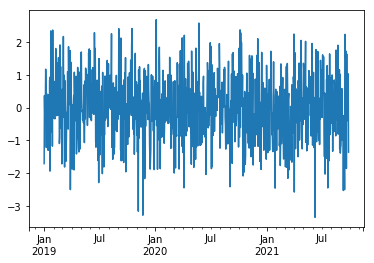

In [51]:
gain_loss.plot()

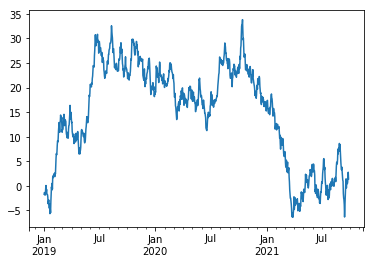

In [52]:
cumulative_gain = gain_loss.cumsum()
cumulative_gain.plot()

### Missed Matched Indexes

In [53]:
odd = pd.Series([1,3,5,7],['a','b','c','d'])
even = pd.Series([2,4,6],['d','b','e'])

odd + even

a    NaN
b    7.0
c    NaN
d    9.0
e    NaN
dtype: float64

### NaN
Not a number, used to indicate a missing value: np.nan

In [54]:
sample = pd.Series([1,2,3,np.nan])
sample

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [55]:
sample[0] = np.nan
sample

0    NaN
1    2.0
2    3.0
3    NaN
dtype: float64

### NaN and Operations

Any operation on NaN result is Nan

In [56]:
odd = pd.Series([1,3,5],['a','b','c'])
even = pd.Series([2,4,6],['d','b','c'])

result = odd + even
result

a     NaN
b     7.0
c    11.0
d     NaN
dtype: float64

In [57]:
result + 1

a     NaN
b     8.0
c    12.0
d     NaN
dtype: float64

In [58]:
result.mean()

9.0

### More Indexing


In [59]:
even = pd.Series([2,4,6],['a','a','b'])
even

a    2
a    4
b    6
dtype: int64

In [60]:
odd = pd.Series([1,3,5],['a','a','b'])
odd + even

a     3
a     7
b    11
dtype: int64

In [61]:
odd = pd.Series([1,3,5],['a','a','b'])
even = pd.Series([2,4,6],['a','a','c'])

odd + even

a    3.0
a    5.0
a    5.0
a    7.0
b    NaN
c    NaN
dtype: float64

In [62]:
odd = pd.Series([1,3],['a','a'])
even = pd.Series([2,4],['a','a'])

odd + even

a    3
a    7
dtype: int64

You might want to avoid having duplicate index values

## Reindexing



In [63]:
d = {'a': 0., 'b': 1., 'c': 2.}
odd_order = pd.Series(d, ['b', 'c', 'd', 'a'])
odd_order

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [64]:
better_order = odd_order.reindex(['a','b','c','d','e'])
better_order

a    0.0
b    1.0
c    2.0
d    NaN
e    NaN
dtype: float64

In [65]:
int_order = odd_order.reindex([1,2,3,4])
int_order

1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

### Replacing an Index

In [66]:
odd_order = pd.Series([1.,2.,3.], ['b', 'c', 'd'])
odd_order

b    1.0
c    2.0
d    3.0
dtype: float64

In [67]:
odd_order.index = [1,2,3]
odd_order

1    1.0
2    2.0
3    3.0
dtype: float64

In [68]:
odd_order.index = ['a',2,"cat"]
odd_order

a      1.0
2      2.0
cat    3.0
dtype: float64

### Expanding while Redexing


In [69]:
gaps = pd.Series(['a','b','c'], [1, 4, 6])
gaps

1    a
4    b
6    c
dtype: object

In [70]:
gaps.reindex(range(7))

0    NaN
1      a
2    NaN
3    NaN
4      b
5    NaN
6      c
dtype: object

In [71]:
gaps.reindex(range(7), method='ffill')   #forward fill

0    NaN
1      a
2      a
3      a
4      b
5      b
6      c
dtype: object

In [72]:
gaps.reindex(range(7), method='bfill')   #backward fill

0    a
1    a
2    b
3    b
4    b
5    c
6    c
dtype: object

In [73]:
gaps.reindex(range(7), fill_value="cat") 

0    cat
1      a
2    cat
3    cat
4      b
5    cat
6      c
dtype: object

In [74]:
gaps.reindex(range(7), fill_value=0) 

0    0
1    a
2    0
3    0
4    b
5    0
6    c
dtype: object

Series not restricted to one data type

### DataFrame

2D data structure: Rows & Columns labeled. Columns can have different data types

Create from
* Dictionary of 1D ndarrays, listss, dicts, or Series
* 2D numpy.ndarray
* Structured or record ndarray
* Series
* Another DataFrame
* File - csv, excel, etc

In [75]:
data = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
        'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

sample_df = pd.DataFrame(data)
sample_df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [76]:
data = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
        'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

sample_df = pd.DataFrame(data, index=['d','c','b'])
sample_df

,one,two
d,NaN,4.0
c,3.0,3.0
b,2.0,2.0


In [77]:
data = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
        'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

sample_df = pd.DataFrame(data, index=['d','c','b'], columns=['two', 'one'])
sample_df

,two,one
d,4.0,NaN
c,3.0,3.0
b,2.0,2.0


### Accessing Elements

In [78]:
data = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
        'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
sample_df = pd.DataFrame(data)

sample_df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [79]:
sample_df['one']['a']

1.0

In [80]:
sample_df['one']['a'] = 42
sample_df

,one,two
a,42.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
